## Tolu Arokodare 2024/25 Season
### 30 Games, 17 Goals, 5 Assists


Model Accuracy: 0.9166666666666666

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.86      1.00      0.92         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12



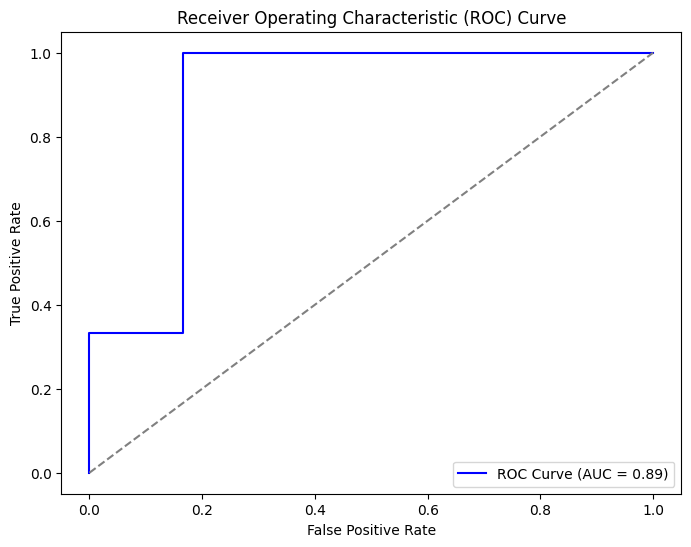

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

# Step 1: Load the Dataset
filepath = "Tolu_2024-25.csv"  
df = pd.read_csv(filepath)

# Step 2: Convert Goals into Binary Target Variable (1 if goals > 0, else 0)
df["Goal_Scored"] = df["Goals"].apply(lambda x: 1 if x > 0 else 0)

# Step 3: Drop irrelevant columns
df.drop(columns=["Date", "Opponent", "Result", "Goals"], inplace=True)

# Step 4: Convert Venue into numerical values (Home=0, Away=1)
df["Venue"] = df["Venue"].map({"Home": 0, "Away": 1})

# Step 5: Normalize numerical features
scaler = StandardScaler()
numerical_features = ["Shots", "Shots on Target", "Minutes", "xG", "Key Passes", "Opp_GA_per_game"]
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Step 6: Define Features (X) and Target (y)
X = df.drop(columns=["Goal_Scored"])  # Features
y = df["Goal_Scored"]  # Target variable (Binary: 1 if player scored, 0 if not)

# Step 7: Split data into Training & Testing sets (Stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# Step 8: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 9: Make Predictions
y_pred = model.predict(X_test)

# Step 10: Evaluate the Model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 11: Plot ROC Curve
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()


📊 Key Takeaways from Your Model
Overall Accuracy → 91.67% ✅

Your model correctly predicted whether the player would score or not in ~92% of test cases.
Class 0 (No Goal Scored)

Precision: 1.00 → Every time the model predicted "No Goal," it was always correct.
Recall: 0.83 → Some instances where the player didn’t score were missed.
Class 1 (Goal Scored)

Precision: 0.86 → When the model predicted "Goal Scored," it was correct 86% of the time.
Recall: 1.00 → It caught all instances where the player actually scored.
Balanced Performance → Both Precision & Recall are strong across both classes, meaning the model is neither too aggressive nor too conservative in predictions. ✅
